# Analyzing USA-Census data

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Collecting the headers by parsing from text file.

In [4]:
def headers(file):
    with open(file, 'r') as f:
        h = []
        lines = f.readlines()
        for i in range(142, 184):
            temp = lines[i].partition(':')[0]
            if temp[0] == '|':
                i = i - 1
                continue
            h.append(temp)
        h.append('Class')
    return h
header = headers("census_income_metadata.txt")
print(pd.DataFrame(header))

                                             0
0                                          age
1                              class of worker
2                     detailed industry recode
3                   detailed occupation recode
4                                    education
5                                wage per hour
6                   enroll in edu inst last wk
7                                 marital stat
8                          major industry code
9                        major occupation code
10                                        race
11                             hispanic origin
12                                         sex
13                     member of a labor union
14                     reason for unemployment
15           full or part time employment stat
16                               capital gains
17                              capital losses
18                       dividends from stocks
19                              tax filer stat
20           

I went through the meta-data file and found the following columns to be continuos.

In [5]:
continuous = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'instance weight',
              'num persons worked for employer', 'weeks worked in year']

Defining some functions:

In [11]:
# Defaults for plots
def plot_(fig, l1, l2, t):
    plt.figure(fig)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.xticks(rotation='vertical')
    plt.title(t)
# Label encoding of all categorical object columns
def encode(df):
    for i in range(df.shape[1]):
        df = df.rename(columns={i: header[i]})
        if header[i] not in continuous and df[header[i]].dtype != 'int64':
            le = preprocessing.LabelEncoder()
            le.fit(df[header[i]])
            df[header[i]] = le.transform(df[header[i]])
    return df
# One hot Coding of all categorical columns
def onehot(df):
    for i in range(df.shape[1]-1):
        if header[i] not in continuous:
            dummies = pd.get_dummies(df[header[i]]).rename(columns=lambda x: header[i]+'_'+str(x))
            df = pd.concat([df, dummies], axis=1)
            df.drop(header[i], inplace=True, axis=1)
    return df
# Retrieving all data
def data():
    df = pd.read_csv("census_income_learn.csv", header=None)
    dft = pd.read_csv("census_income_test.csv", header=None)
    for i in range(df.shape[1]):
        df = df.rename(columns={i: header[i]})
        dft = dft.rename(columns={i: header[i]})
    return df,dft

# Univariable Analysis

I have visualized some specific columns here. Go to this [link](https://github.com/pranshumalviya2/usa_census/tree/master/pics) for vizualing all columns.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]), <a list of 91 Text xticklabel objects>)

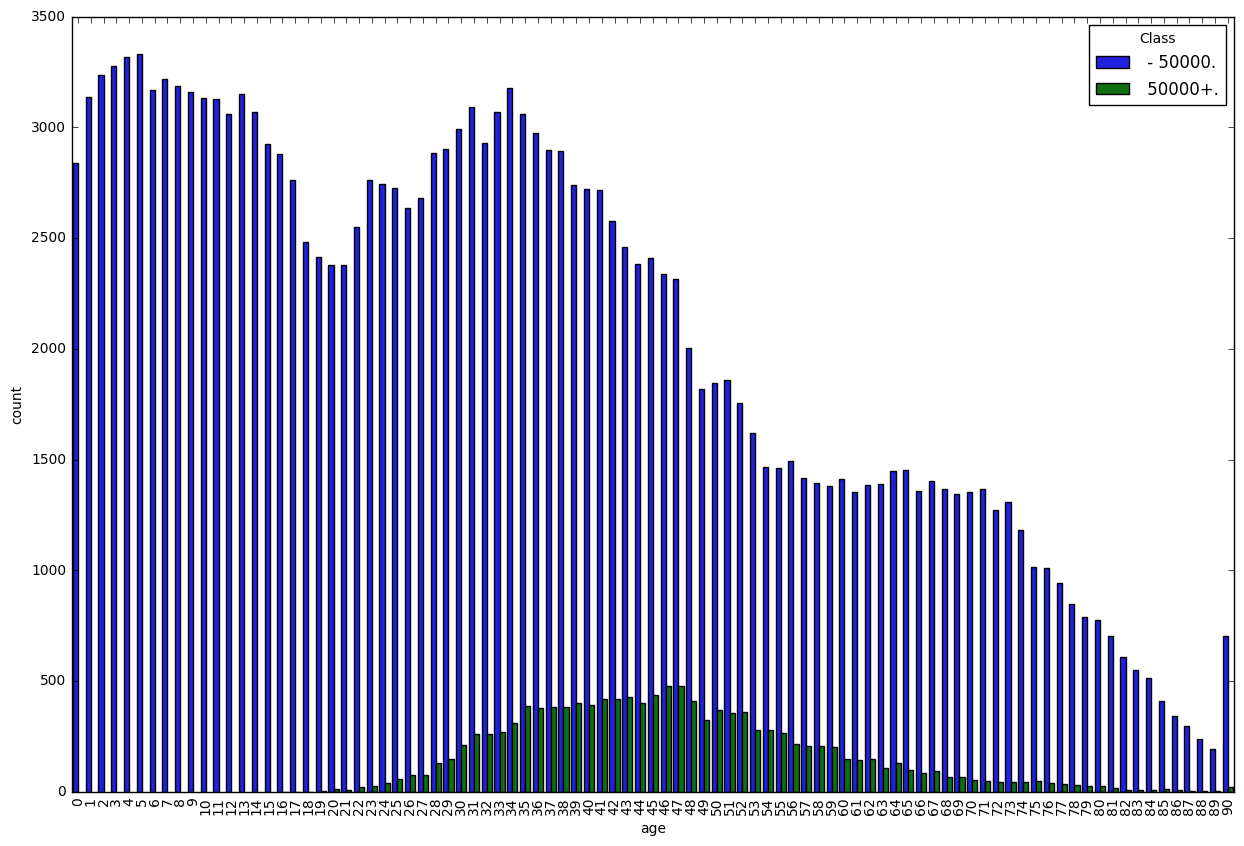

In [12]:
df,dft = restore()
x=0
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")

Clearly, as far as age is concerned, it is obvious that people with age between 35 - 55 earn more than 50000 as compared to others.  
One more thing to notice here is data for people earning less than 50000 mostly consists of children (age: 0-16) and adults (age: 22-50) i.e. there's a minima around teenagers where the +50000 category actually comes into existance.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

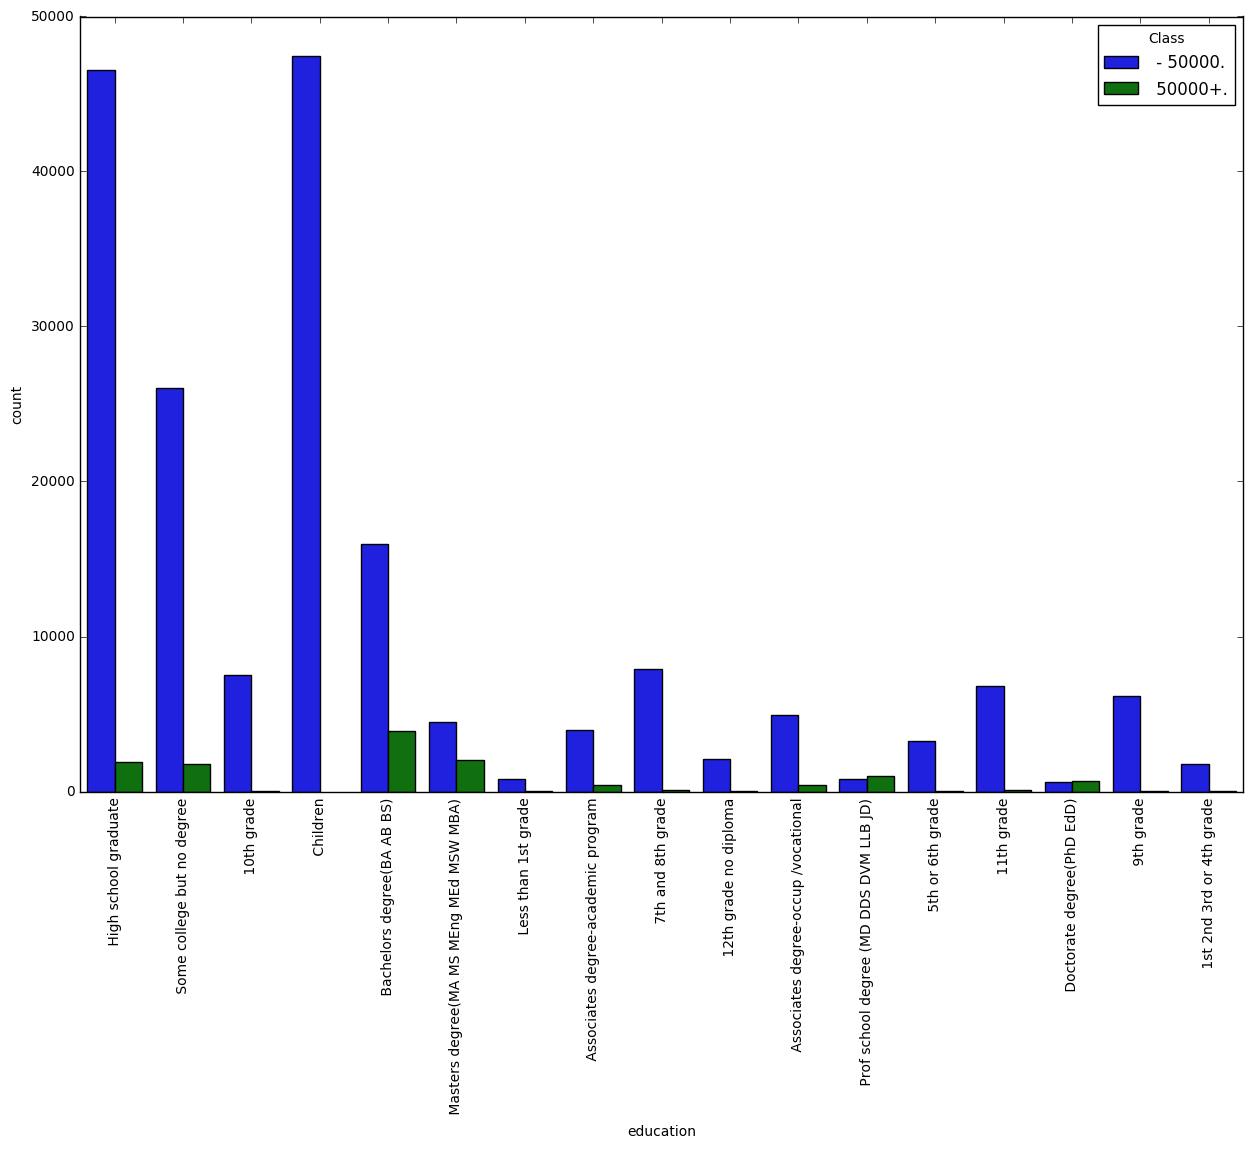

In [15]:
x=4
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")

In this graph we can observe following things:

1. In case of category -50000, population of children and high school graduates is very high, that we also observed in while analyzing age.
2. Whereas, for maximum people with +50000 earning belongs has education of Bachelors or Masters degree.
3. But it is quite interesting to notice that, there's more number of people with PhD / MD / LLB etc that earn more than 50000 comparitively. In fact, these are only two categories that shows this kind of behaviour.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

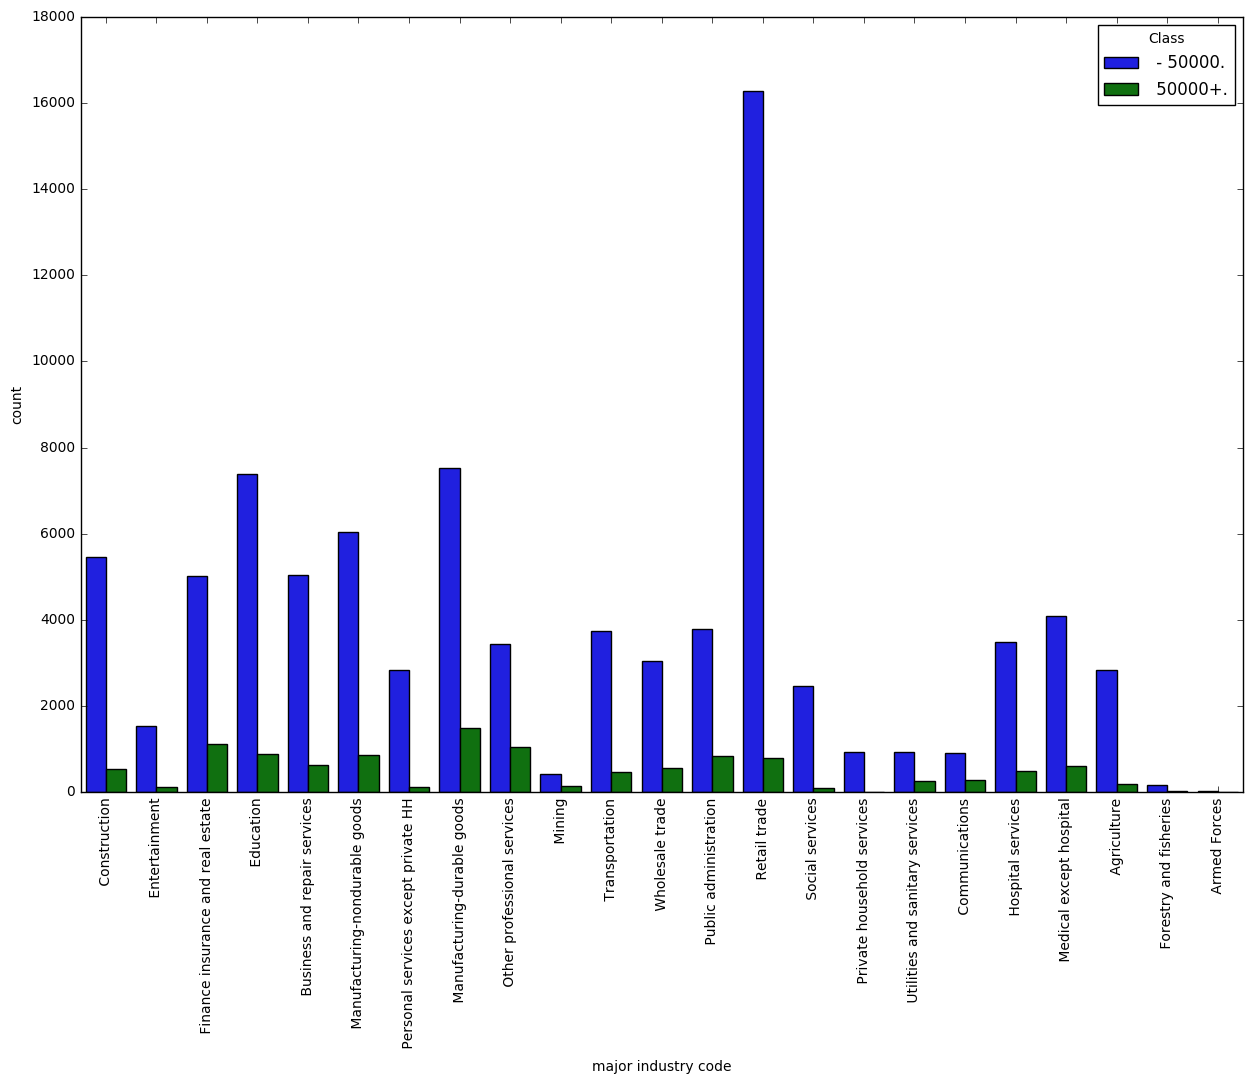

In [22]:
x=8
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=header[x], hue="Class", data=df[df.iloc[:,x] != " Not in universe or children"])
plt.xticks(rotation="vertical")

Major industries:

1. Retail trade means earnings lesser than 50000.
2. Major industries with earnings +50000 are Manufacturing durable/non-durable goods, Finance insurance and real estate.
3. Altohugh communications, utility and sanitary services are low in number, their comparitive ratio of is higher for earning +50000.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

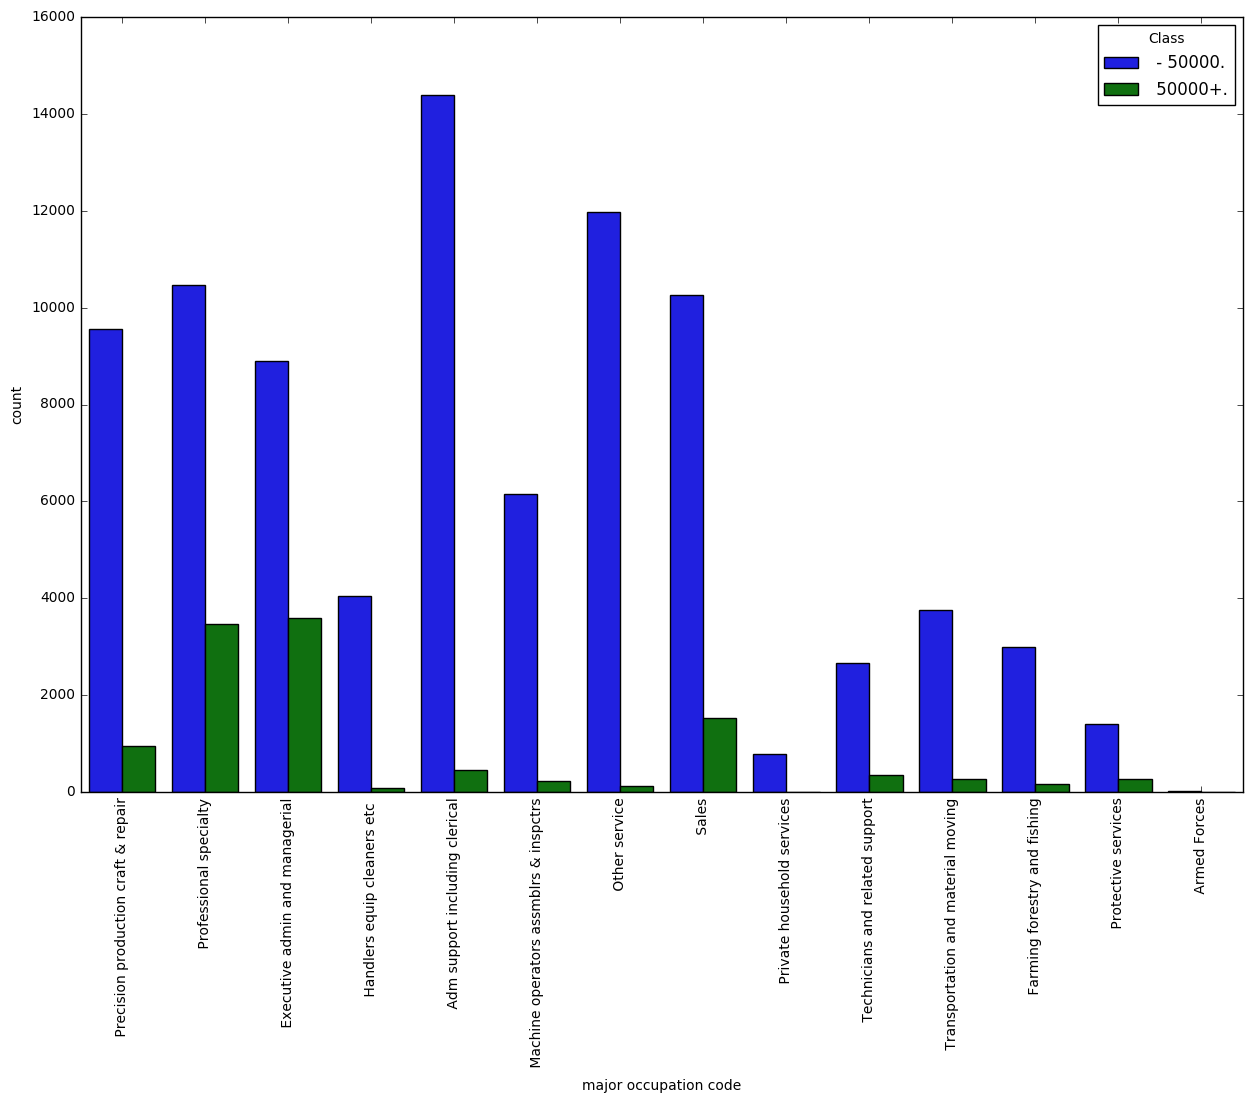

In [24]:
x=9
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x=header[x], hue="Class", data=df[df.iloc[:,x] != " Not in universe"])
plt.xticks(rotation="vertical")

Observation:

1. Professional specialty, executive admin and managerial occupations are important for earning +50000.

# Label Encoding of categorical data

In [115]:
df = encode(df)
dft = encode(dft)
print(df.head())

   age  class of worker  detailed industry recode  detailed occupation recode  \
0   73                3                         0                           0   
1   58                6                         4                          34   
2   18                3                         0                           0   
3    9                3                         0                           0   
4   10                3                         0                           0   

   education  wage per hour  enroll in edu inst last wk  marital stat  \
0         12              0                           2             6   
1         16              0                           2             0   
2          0              0                           1             4   
3         10              0                           2             4   
4         10              0                           2             4   

   major industry code  major occupation code  ...    country of birth fat

# Correlation

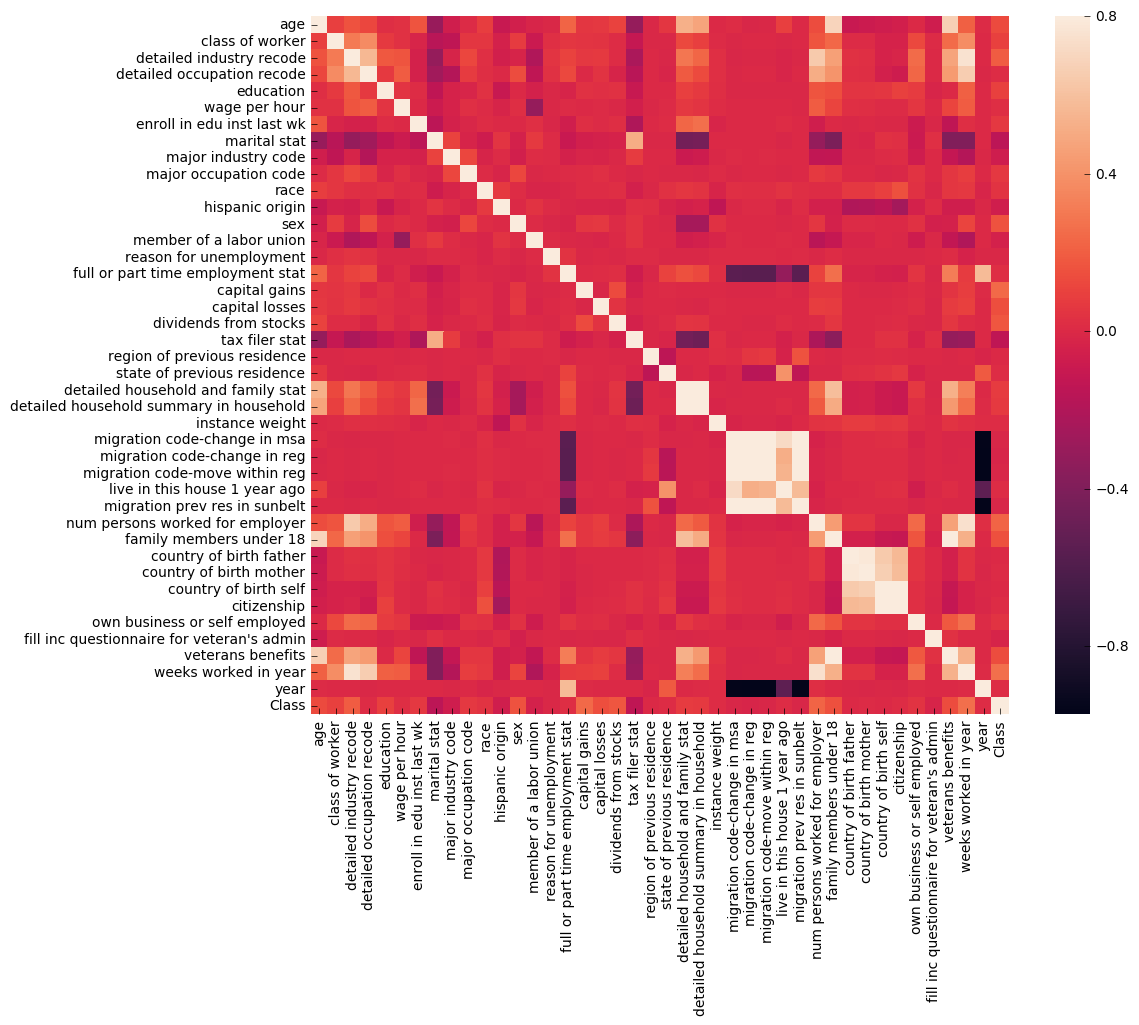

In [67]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

These are the observations:

Making sense:
1. similar columns like household and family status, types of migrations
2. migrations are opposite to year
3. year is somewhat related to full or part time employement status
4. age is similar to family members under 18, veterans benefits
5. country of birth is similar to citizenship
6. weeks worked in year is very similar to number of persons worked for employer and industry code

Does not make sense:
1. Nothing is correlated to Class!!!!!

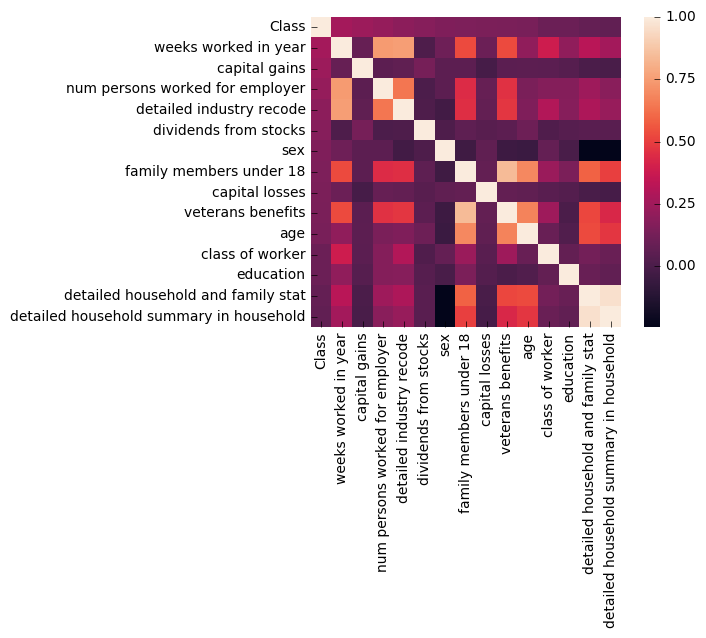

In [68]:
k = 15
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)

Somewhat Correlated:

1. Weeks worked in year
2. capital gains
3. industry
4. education
5. family members under 18
6. class of worker
7. sex
8. age

# Logistic Regression with label-encoding

In [116]:
x_tr,y_tr = df.drop('Class', axis=1), df["Class"]
x_t,y_t = dft.drop('Class', axis=1), dft["Class"]
print(x_tr.shape,y_tr.shape)

(199523, 41) (199523,)


In [110]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
w = lr.coef_
for i in range(len(w)):
    if header[i] in continuous:
        w[0,i]*=df[header[i]].median()
ind=np.array(w.argsort()[0])[::-1]
theta = 0
for i in ind:
    if w[0,i]>theta:
        print(i," : ",w[0,i]," : ",x_tr.columns[i])
lr.score(x_tr,y_tr)

12  :  1.56689607225  :  sex
0  :  0.932695291871  :  age
31  :  0.471264208268  :  family members under 18
6  :  0.466481973462  :  enroll in edu inst last wk
28  :  0.234151414907  :  live in this house 1 year ago
30  :  0.150462199907  :  num persons worked for employer
23  :  0.146237514923  :  detailed household summary in household
10  :  0.11201355974  :  race
20  :  0.0718623643303  :  region of previous residence
13  :  0.0701570965275  :  member of a labor union
39  :  0.0633881748574  :  weeks worked in year
38  :  0.0435644362565  :  veterans benefits
9  :  0.0431666555086  :  major occupation code
1  :  0.0382545727847  :  class of worker
14  :  0.0374779672455  :  reason for unemployment
4  :  0.0364488061151  :  education
27  :  0.0351222308028  :  migration code-move within reg
35  :  0.0154734011806  :  citizenship
2  :  0.0059070129721  :  detailed industry recode
17  :  0.000664297541704  :  capital losses
18  :  0.000220038898422  :  dividends from stocks
16  :  0.0

0.21878179458007346

Similar to correraltion one. But bad results.

Some column with comparitively larger weights:
1. sex
2. age
3. family members under 18
4. num persons worked for employer
5. household summary
6. weeks wored in year
7. class of worker
8. education
9. industry
10. capital gains

# One-hot coding¶

In [10]:
df,dft = restore()
dfoh = onehot(df)
x_troh,y_troh = dfoh.drop('Class', axis=1), df["Class"]
dftoh = onehot(dft)
dftoh["detailed household and family stat_ Grandchild <18 ever marr not in subfamily"]=0
x_toh,y_toh = dftoh.drop('Class', axis=1), dft["Class"]

# Logistic Regression

In [30]:
lrh = LogisticRegression()
lrh.fit(x_troh,y_troh)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
w = lrh.coef_
for i in range(len(w)):
    if header[i] in continuous:
        w[0,i]*=df[header[i]].median()
ind=np.array(w.argsort()[0])[::-1]
top_results={i:0 for i in header[:-1]}
for i in ind:
    col = x_troh.columns[i].partition('_')[0]
    top_results[col]+=abs(w[0,i])
    #print(w[0,i]," : ",x_tr.columns[i])
print("Score\t :\tColumn")
for i,j in sorted(top_results.items(), key=lambda x: x[1])[::-1]:
    if j>1:
        print(j,"\t:",i)
# df_red = dfoh[ind[w[0,ind]>theta]]
lrh.score(x_troh,y_troh)

Score	 :	Column
11.6686315769 	: detailed occupation recode
11.2549279468 	: education
8.83446425134 	: detailed industry recode
4.99598822993 	: major occupation code
3.61321967673 	: major industry code
2.49628478289 	: tax filer stat
2.4758196386 	: country of birth mother
2.35745811005 	: state of previous residence
2.11186705074 	: class of worker
2.02705663502 	: country of birth father
2.00198247634 	: country of birth self
1.90024564485 	: detailed household and family stat
1.6875230465 	: detailed household summary in household
1.54702122358 	: full or part time employment stat
1.35923274977 	: hispanic origin
1.13565343749 	: sex
1.05502081377 	: own business or self employed
1.05237143367 	: migration code-change in msa
1.03977725967 	: region of previous residence
1.01406368619 	: age


0.22626464116918851

Again same results: 

Columns that : 
education 
occupation
industry
Class of worker
previous residence
country of birth
household
sex

# Decision Trees

In [26]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_troh, y_troh)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [59]:
w = dt.feature_importances_
top_results={i:0 for i in header[:-1]}
for i in ind:
    col = x_troh.columns[i].partition('_')[0]
    top_results[col]+=abs(w[i])
    #print(w[i]," : ",x_tr.columns[i])
for i,j in sorted(top_results.items(), key=lambda x: x[1])[::-1]:
    if j>0.01:
        print(header.index(i),"\t:",j,"\t:",i)
dt.score(x_troh,y_troh)

16 	: 0.124124362353 	: capital gains
24 	: 0.0966454713163 	: instance weight
18 	: 0.0893762335233 	: dividends from stocks
0 	: 0.0796866079693 	: age
39 	: 0.0650221172331 	: weeks worked in year
4 	: 0.0569088208163 	: education
2 	: 0.0532890585014 	: detailed industry recode
9 	: 0.0526242012034 	: major occupation code
3 	: 0.0482719535969 	: detailed occupation recode
12 	: 0.0348179318775 	: sex
8 	: 0.0312499074928 	: major industry code
30 	: 0.0286453963938 	: num persons worked for employer
17 	: 0.02567372778 	: capital losses
1 	: 0.0214618699998 	: class of worker
32 	: 0.0153519032576 	: country of birth father
33 	: 0.015060284197 	: country of birth mother
19 	: 0.0148875497397 	: tax filer stat
22 	: 0.0129440619309 	: detailed household and family stat
15 	: 0.0127769243791 	: full or part time employment stat
7 	: 0.0126677688594 	: marital stat
36 	: 0.0121523353826 	: own business or self employed
13 	: 0.0102946568552 	: member of a labor union


0.9999949880464909

Woah!
Did i do something wrong in logistics?

instance weight
capital gains
age
occupation
weeks per year
industry
education 
sex
num persons worked for employer
class of workers
tax filer

# Random Forest

In [45]:
rf = RandomForestClassifier()
rf.fit(x_troh,y_troh)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
w = rf.feature_importances_
ind=np.array(w.argsort())[::-1]
for i in ind:
    if w[i]>0.005:
        print(i," : ",w[i]," : ",x_troh.columns[i])

0  :  0.0739459689153  :  age
5  :  0.0707180139777  :  instance weight
4  :  0.0632157660094  :  dividends from stocks
2  :  0.0616202954119  :  capital gains
7  :  0.0366001608399  :  weeks worked in year
6  :  0.0317211102629  :  num persons worked for employer
3  :  0.0230585786632  :  capital losses
169  :  0.0177240772452  :  major occupation code_ Executive admin and managerial
197  :  0.0165630460099  :  sex_ Female
130  :  0.0158888068273  :  education_ Masters degree(MA MS MEng MEd MSW MBA)
131  :  0.0148529861033  :  education_ Prof school degree (MD DDS DVM LLB JD)
198  :  0.0141248495251  :  sex_ Male
125  :  0.0138071748604  :  education_ Bachelors degree(BA AB BS)
177  :  0.0129729357425  :  major occupation code_ Professional specialty
71  :  0.0119947764457  :  detailed occupation recode_2
128  :  0.011232543426  :  education_ High school graduate
140  :  0.00953902568417  :  marital stat_ Never married
132  :  0.00890401256194  :  education_ Some college but no degree

In [58]:
w = rf.feature_importances_
ind=np.array(w.argsort())[::-1]
top_results={i:0 for i in header[:-1]}
for i in ind:
    col = x_troh.columns[i].partition('_')[0]
    top_results[col]+=abs(w[i])
    #print(w[i]," : ",x_tr.columns[i])
for i,j in sorted(top_results.items(), key=lambda x: x[1])[::-1]:
    if j>0.01:
        print(header.index(i),"\t:",j,"\t:",i)
rf.score(x_troh,y_troh)

4 	: 0.0848135132703 	: education
3 	: 0.0786734033785 	: detailed occupation recode
0 	: 0.0739459689153 	: age
24 	: 0.0707180139777 	: instance weight
2 	: 0.0648519837113 	: detailed industry recode
18 	: 0.0632157660094 	: dividends from stocks
16 	: 0.0616202954119 	: capital gains
9 	: 0.0524393365273 	: major occupation code
8 	: 0.0446860247429 	: major industry code
39 	: 0.0366001608399 	: weeks worked in year
30 	: 0.0317211102629 	: num persons worked for employer
12 	: 0.030687895535 	: sex
1 	: 0.0277637608561 	: class of worker
17 	: 0.0230585786632 	: capital losses
22 	: 0.0216663262089 	: detailed household and family stat
7 	: 0.0214116585053 	: marital stat
19 	: 0.0201290575064 	: tax filer stat
32 	: 0.0191569787937 	: country of birth father
36 	: 0.0180532837995 	: own business or self employed
33 	: 0.0179963077312 	: country of birth mother
13 	: 0.0161704689592 	: member of a labor union
23 	: 0.0142595932684 	: detailed household summary in household
15 	: 

0.9950882855610631

education
occupation
age
industry
dividends from stock
capital gains
weeksworked in year

In [60]:
dt.score(x_toh,y_toh)

0.76179306750065157

In [61]:
rf.score(x_toh,y_toh)

0.94565064854353365

Clearly, random forest wins

# More visualization

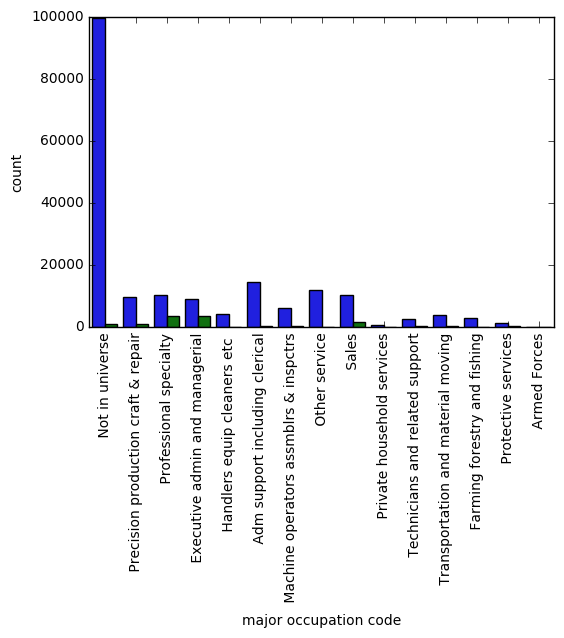

In [65]:
x=9
plot_(0, header[x],header[y], "")
ax=sns.countplot(x=header[x],hue="Class", data=df)
ax.legend_.remove()

169  :  0.0177240772452  :  major occupation code_ Executive admin and managerial

177  :  0.0129729357425  :  major occupation code_ Professional specialty

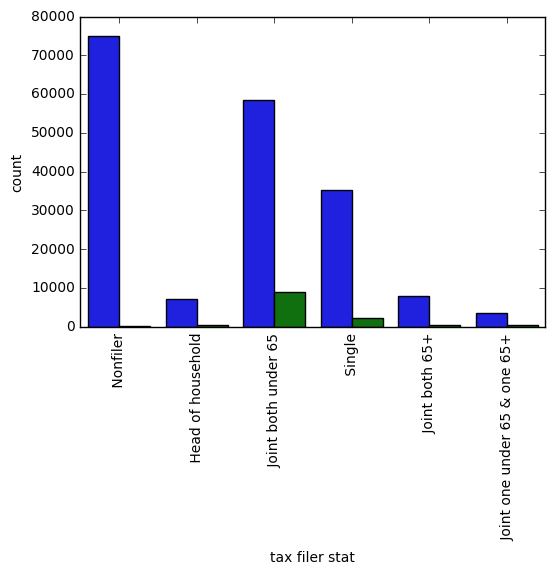

In [85]:
x=19
plot_(0, header[x],header[y], "")
ax=sns.countplot(x=header[x],hue="Class", data=df)
ax.legend_.remove()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

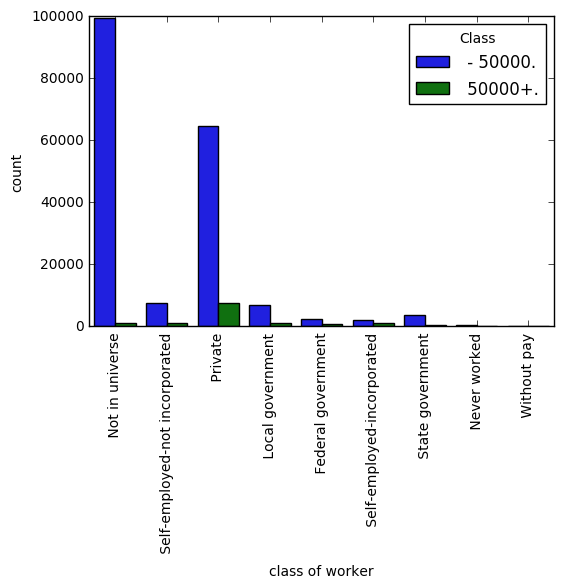

In [145]:
x=1
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

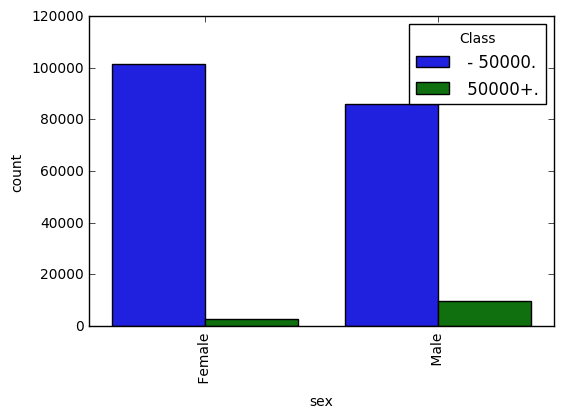

In [69]:
x=12
sns.countplot(x=header[x], hue="Class", data=df)
plt.xticks(rotation="vertical")